In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score

In [4]:
df = pd.read_csv(r"C:\Users\bryan\Desktop\heart.csv")

In [5]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [6]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


# Data Processing and Feature Extraction

In [7]:
#find missing or NULL values
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

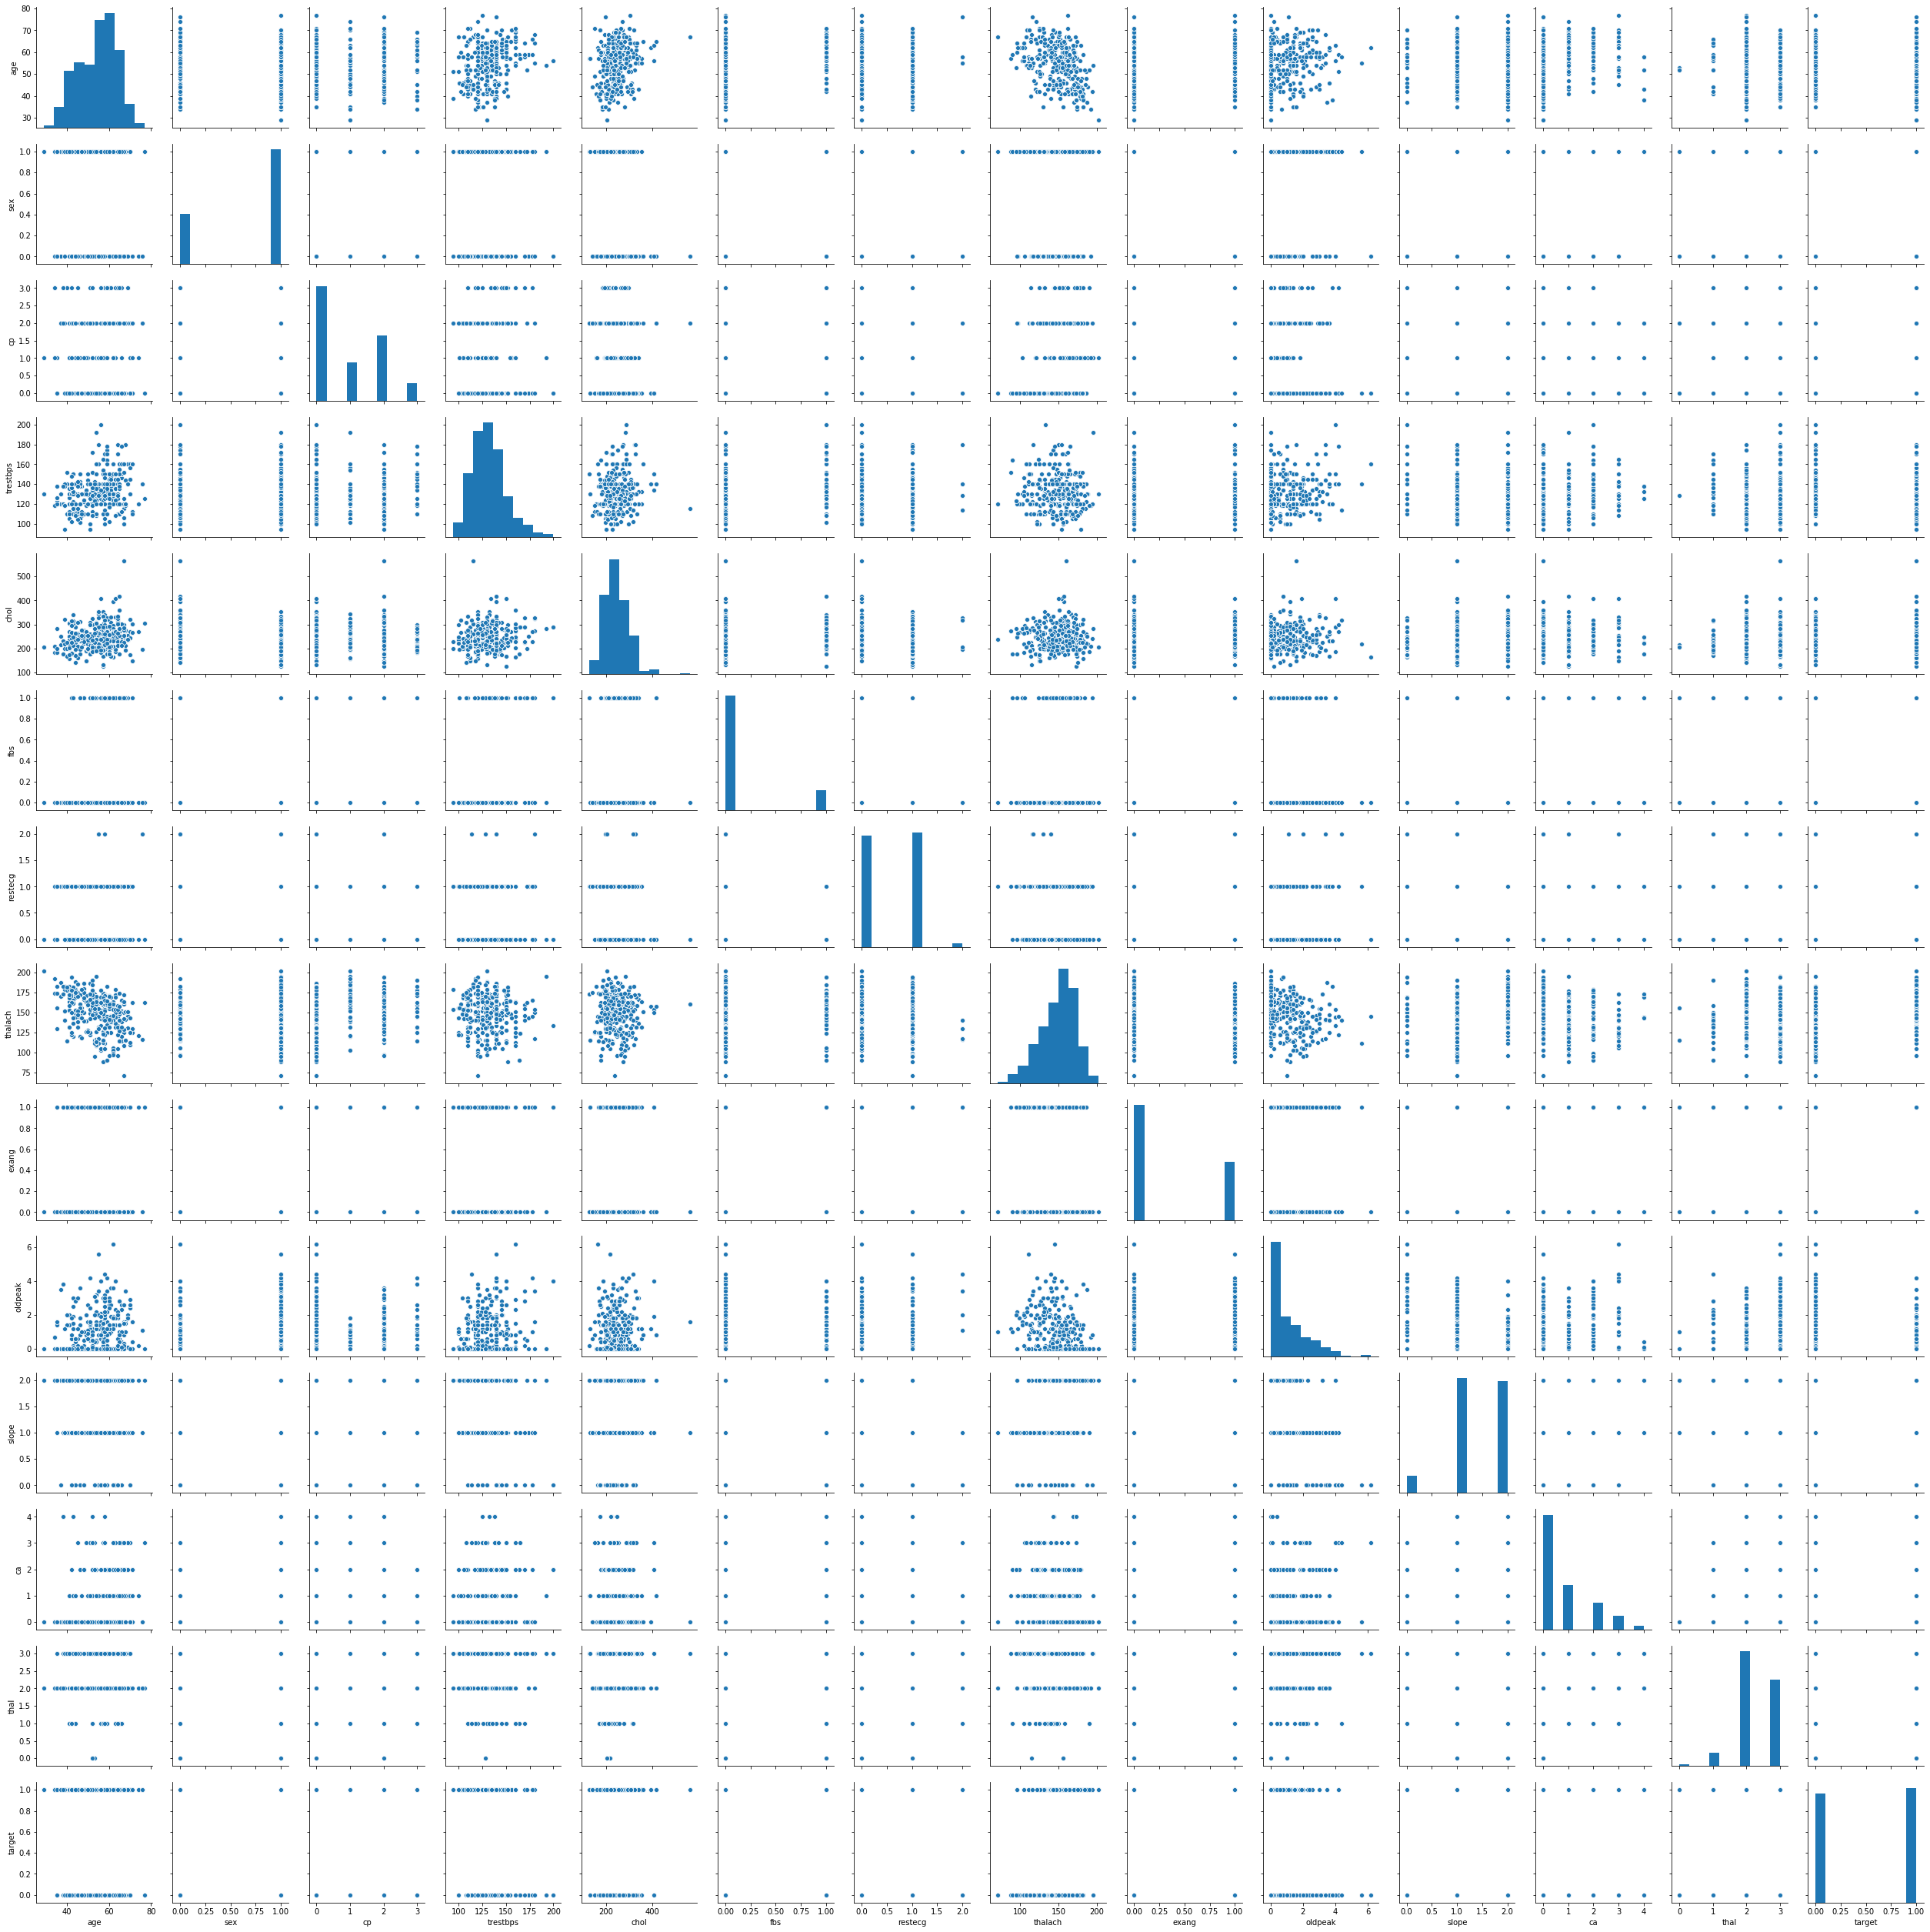

In [8]:
#explore plotting for every feature using pairplot
sns.pairplot(df)

In [9]:
#descriptive summary of model features
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [10]:
#correlation between every feature
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.103240,-0.071966,0.271121,0.219823,0.121243,-0.132696,-0.390227,0.088163,0.208137,-0.169105,0.271551,0.072297,-0.229324
sex,-0.103240,1.000000,-0.041119,-0.078974,-0.198258,0.027200,-0.055117,-0.049365,0.139157,0.084687,-0.026666,0.111729,0.198424,-0.279501
cp,-0.071966,-0.041119,1.000000,0.038177,-0.081641,0.079294,0.043581,0.306839,-0.401513,-0.174733,0.131633,-0.176206,-0.163341,0.434854
trestbps,0.271121,-0.078974,0.038177,1.000000,0.127977,0.181767,-0.123794,-0.039264,0.061197,0.187434,-0.120445,0.104554,0.059276,-0.138772
chol,0.219823,-0.198258,-0.081641,0.127977,1.000000,0.026917,-0.147410,-0.021772,0.067382,0.064880,-0.014248,0.074259,0.100244,-0.099966
fbs,0.121243,0.027200,0.079294,0.181767,0.026917,1.000000,-0.104051,-0.008866,0.049261,0.010859,-0.061902,0.137156,-0.042177,-0.041164
restecg,-0.132696,-0.055117,0.043581,-0.123794,-0.147410,-0.104051,1.000000,0.048411,-0.065606,-0.050114,0.086086,-0.078072,-0.020504,0.134468
thalach,-0.390227,-0.049365,0.306839,-0.039264,-0.021772,-0.008866,0.048411,1.000000,-0.380281,-0.349796,0.395308,-0.207888,-0.098068,0.422895
exang,0.088163,0.139157,-0.401513,0.061197,0.067382,0.049261,-0.065606,-0.380281,1.000000,0.310844,-0.267335,0.107849,0.197201,-0.438029
oldpeak,0.208137,0.084687,-0.174733,0.187434,0.064880,0.010859,-0.050114,-0.349796,0.310844,1.000000,-0.575189,0.221816,0.202672,-0.438441


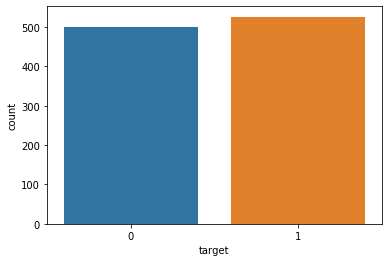

In [11]:
#explore the breakdown of target feature (y-value)
sns.countplot(df['target'])

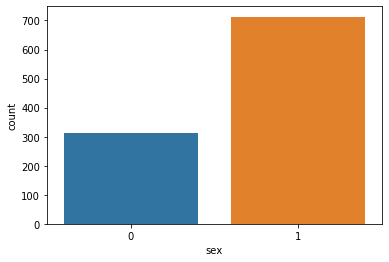

In [12]:
#breakdown of gender
sns.countplot(x="sex", data=df)

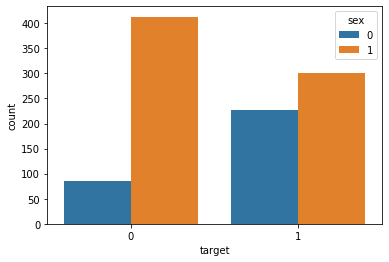

In [13]:
#gender in terms of target value
ax = sns.countplot(x="target", hue="sex", data=df)

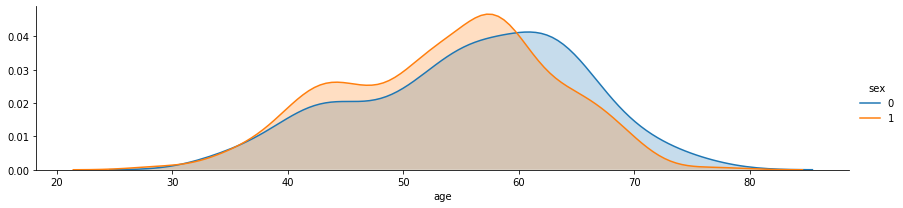

In [14]:
#visualizing age and sex
fig = sns.FacetGrid(data=df, hue='sex',aspect=4)
fig.map(sns.kdeplot,'age',shade=True)
fig.add_legend()

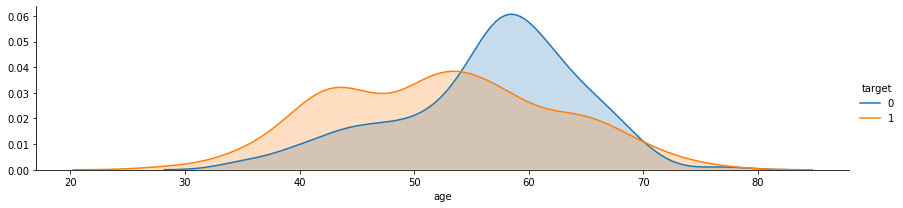

In [15]:
fig = sns.FacetGrid(data=df, hue='target',aspect=4)
fig.map(sns.kdeplot,'age',shade=True)
fig.add_legend()

In [16]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [17]:
#define X and y values for modeling purposes
X = df[['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal']].values
y = df['target'].values

In [18]:
X.shape

(1025, 13)

In [19]:
y.shape

(1025,)

In [20]:
#split data into training and testing
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

# Model Test 1: Logisitc Regression

In [22]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(X_test, y_test)

C:\Users\bryan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [23]:
y_pred = clf.predict(X_test)

In [24]:
#test the acurracy of the model
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred))

from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.87      0.78      0.82       146
           1       0.82      0.90      0.86       162

    accuracy                           0.84       308
   macro avg       0.84      0.84      0.84       308
weighted avg       0.84      0.84      0.84       308



array([[114,  32],
       [ 17, 145]], dtype=int64)

In [25]:
scores = cross_val_score(clf, X, y, cv=10, scoring='accuracy');
scores.mean()

C:\Users\bryan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\bryan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

0.8399105273177232

In [26]:
clf.coef_

array([[ 4.27221830e-03, -1.87944537e+00,  1.00072764e+00,
        -2.57964097e-02, -1.27916600e-03, -5.41926440e-01,
         1.37383618e-01,  4.39672359e-02, -6.92167136e-01,
        -3.12259815e-01,  6.11733847e-01, -8.62579257e-01,
        -1.02151107e+00]])

In [27]:
#R2 score: variance in dependant values
from sklearn.metrics import r2_score

print(r2_score(y_pred, y_test))

0.349118040281192


No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.942


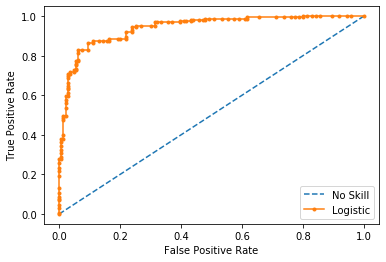

In [28]:
#ROC curve to vizualize how well the model is performing

ns_probs = [0 for _ in range(len(y_test))]

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

lr_probs = clf.predict_proba(X_test)
lr_probs1 = lr_probs[:, 1]

ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs1)

print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
lr_auc = roc_auc_score(y_test, lr_probs1)

ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs1)

plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

In [29]:
X_new = [[52,1,0,125,212,0,1,168,0,1.0,2,2,3]]

In [30]:
clf.predict(X_new)

array([0], dtype=int64)

In [31]:
X_new2 = [[59,1,1,140,221,0,1,164,1,0.0,2,0,2]]

In [32]:
clf.predict(X_new2)

array([1], dtype=int64)

# Model Test 2: Linear Support Vector Machine

In [33]:
from sklearn import svm

classifier = svm.SVC(kernel='linear', gamma='auto',probability=True)
classifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [34]:
ypred = classifier.predict(X_test)

In [35]:
scores2 = cross_val_score(classifier, X, y, cv=10, scoring='accuracy')
scores2.mean()

0.8408623643632211

In [36]:
from sklearn.metrics import classification_report

print(classification_report(y_test,ypred))

from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, ypred)

              precision    recall  f1-score   support

           0       0.87      0.79      0.83       146
           1       0.83      0.90      0.86       162

    accuracy                           0.85       308
   macro avg       0.85      0.84      0.85       308
weighted avg       0.85      0.85      0.85       308



array([[116,  30],
       [ 17, 145]], dtype=int64)

In [37]:
from sklearn.metrics import r2_score

print(r2_score(ypred, y_test))

0.3780451127819551


No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.926


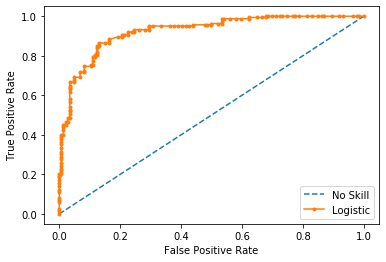

In [38]:
#ROC curve
ns_probs = [0 for _ in range(len(y_test))]

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

lr_probs = classifier.predict_proba(X_test)
lr_probs1 = lr_probs[:, 1]

ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs1)

print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
lr_auc = roc_auc_score(y_test, lr_probs1)

ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs1)

plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

# Model Test 3: Random Forest

In [39]:
from sklearn.ensemble import RandomForestClassifier
classifier2 = RandomForestClassifier(n_estimators = 10, criterion = 'entropy')
classifier2.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [40]:
ypredd = classifier2.predict(X_test)

In [41]:
scores3 = cross_val_score(classifier2, X, y, cv=8)
scores3.mean()

0.9931640625

In [42]:
from sklearn.metrics import classification_report

print(classification_report(y_test,ypredd))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       146
           1       1.00      0.98      0.99       162

    accuracy                           0.99       308
   macro avg       0.99      0.99      0.99       308
weighted avg       0.99      0.99      0.99       308



In [43]:
from sklearn.metrics import r2_score

print(r2_score(ypredd, y_test))

0.9609978472837787


In [44]:
X_new = [[52,1,0,125,212,0,1,168,0,1.0,2,2,3]]
classifier2.predict(X_new)

array([0], dtype=int64)

In [45]:
X_new2 =  [[59,1,1,140,221,0,1,164,1,0.0,2,0,2]]
classifier2.predict(X_new2)

array([1], dtype=int64)

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.999


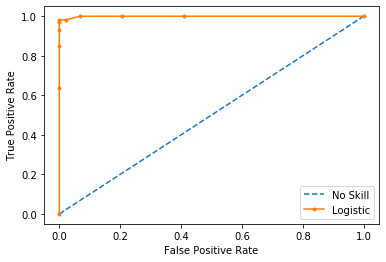

In [46]:
#ROC curve
ns_probs = [0 for _ in range(len(y_test))]

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

lr_probs = classifier2.predict_proba(X_test)
lr_probs1 = lr_probs[:, 1]

ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs1)

print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
lr_auc = roc_auc_score(y_test, lr_probs1)

ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs1)

plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

# Model Test 4: KNeighbors

In [47]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=2)
scores4 = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
scores4.mean()

0.9629164287074052

In [48]:
k_range = range(1, 31)
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())
print(k_scores)

[0.9941747572815534, 0.9629164287074052, 0.9433942509042452, 0.8349990481629546, 0.7599466971254522, 0.7629449838187702, 0.720911859889587, 0.7179421283076337, 0.7443080144679232, 0.7393965353131545, 0.7227869788692176, 0.7276413478012564, 0.7052160670093282, 0.7139920045688178, 0.7159242337711784, 0.7149533599847706, 0.7335237007424329, 0.7442889777270132, 0.7267371026080335, 0.7267656577193985, 0.7208261945554921, 0.7169046259280412, 0.7207881210736723, 0.7208261945554921, 0.7237483342851705, 0.725671045117076, 0.721787549971445, 0.710041880830002, 0.7139539310869979, 0.6954407005520655]


Text(0, 0.5, 'Cross-Validated Accuracy')

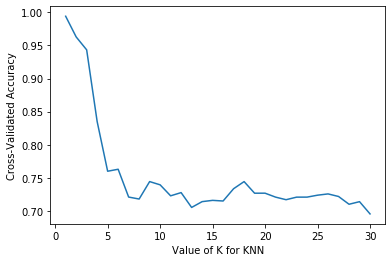

In [49]:
#plotting the value for K; from this model, the most accurate value would be around 2
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

# Model Test 5: XGBoost

In [50]:
import xgboost as xgb

train = xgb.DMatrix(X_train, label=y_train)
test = xgb.DMatrix(X_test, label=y_test)

In [51]:
param = {
    'max_depth': 4,
    'eta': 0.3,
    'objective': 'multi:softmax',
    'num_class': 3}
epochs = 10

In [52]:
model = xgb.train(param, train, epochs)

In [53]:
predictions = model.predict(test)

In [54]:
print(predictions)

[1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1.
 1. 1. 1. 0. 1. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 1. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 1. 1. 0. 0. 1.
 0. 0. 1. 1. 1. 0. 0. 0. 1. 0. 1. 1. 0. 1. 0. 1. 0. 1. 1. 0. 0. 0. 1. 1.
 1. 0. 1. 1. 1. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 1. 0. 1. 1. 0. 0. 1. 1. 1.
 0. 1. 0. 0. 1. 1. 0. 0. 1. 0. 0. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1. 1.
 0. 1. 1. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0.
 1. 0. 1. 0. 0. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 1. 1. 0. 0.
 0. 0. 1. 1. 1. 0. 0. 1. 1. 1. 1. 0. 1. 0. 0. 0. 1. 1. 1. 1. 1. 0. 1. 0.
 1. 1. 0. 1. 1. 1. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 1. 0. 1. 0. 1. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 1. 1. 0. 0. 0. 1. 1. 1. 1.
 0. 1. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1. 1. 0. 0. 1. 0. 1.
 0. 0. 1. 1. 1. 1. 0. 1. 0. 0. 1. 0. 1. 0. 1. 0. 1. 1. 1. 1.]


In [55]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, predictions)

0.935064935064935

In [59]:
print("SVM: 81%" + "\n" + "Logistic Regression: 83%" + "\n" + "XGBoost: 93%" + "\n" + "KNeighbors: 96%" + "\n" + "Random Forest: 99%")

SVM: 81%
Logistic Regression: 83%
XGBoost: 93%
KNeighbors: 96%
Random Forest: 99%
